**Stock Price Prediction and Forecasting Using Stack LSTM**

In [1]:
import pandas as pd 
import pandas_datareader as pdr

In [2]:
# Loading the dataset 
Data = pd.read_csv("AAPL.csv")
Data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
Data.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [4]:
# Resetting the data index 
Data_1 = Data.reset_index()['close']
Data_1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [5]:
Data_1.shape

(1258,)

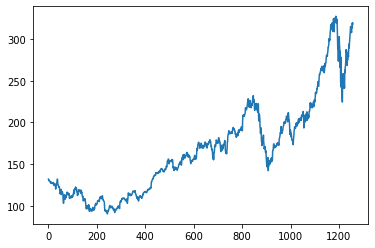

In [6]:
# Importing the maatplotlib for visualisation

import matplotlib.pyplot as plt

plt.plot(Data_1)

In [7]:
import numpy as np

**Scalling the data**

In [8]:
from sklearn.preprocessing import MinMaxScaler

Scalar = MinMaxScaler(feature_range = (0,1))
Data_1  = Scalar.fit_transform( np.array(Data_1).reshape(-1,1) )


In [9]:
print(Data_1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [10]:
Data_1.shape

(1258, 1)

Spliting the Data

In [11]:
Training_size = int(len(Data_1)*0.65)
Testing_size = int(len(Data_1) - Training_size)


In [12]:
Training_data = Data_1[0:Training_size,:]
Testing_data = Data_1[Training_size:len(Data_1),:1]


In [13]:
print(Training_data.shape) ; print(Testing_data.shape)

(817, 1)
(441, 1)


**Function for creating the dataset which will be input to stack LSTM**

In [14]:
def create_dataset(dataset,time_step = 1):
  data_x , data_y = [], []
  for i in range(len(dataset)- time_step - 1):
    a = dataset[i:(i + time_step), 0] 
    data_x.append(a)
    data_y.append(dataset[i + time_step, 0 ])
  return np.array(data_x),np.array(data_y)


In [15]:
# Creating the training dataset and testing dataset
Time_step = 100 
X_Train, Y_Train = create_dataset(Training_data,time_step= Time_step )
X_Test, Y_Test = create_dataset( Testing_data, Time_step )

In [18]:
X_Test.shape

(340, 100)

In [19]:
# Reshaping the samples to be [ samples, time_step, features ] whih is required of LSTM 
X_Train = X_Train.reshape( X_Train.shape[0], X_Train.shape[1], 1)
X_Test = X_Test.reshape( X_Test.shape[0], X_Test.shape[1] ,1 ) 

In [20]:
print(X_Train.shape) ; print(X_Test.shape)

(716, 100, 1)
(340, 100, 1)


**Create the stack LSTM Model**

In [21]:
# Importing the modules required for building the stack LSRM model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [23]:
Model = Sequential()
Model.add(LSTM(50,return_sequences=True, input_shape = (100,1)))
Model.add(LSTM(50, return_sequences=True))
Model.add(LSTM(50))
Model.add(Dense(1))
Model.compile(loss='mean_squared_error', optimizer = 'adam')

In [25]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
Model.fit(X_Train,Y_Train,validation_data=(X_Test,Y_Test),epochs = 100, batch_size=64, verbose = 1 )

Epoch 1/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0222 - val_loss: 0.0409
Epoch 2/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 4/100
12/12 [==============================] - 2s 186ms/step - loss: 8.8318e-04 - val_loss: 0.0062
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 6.9140e-04 - val_loss: 0.0051
Epoch 6/100
12/12 [==============================] - 2s 188ms/step - loss: 6.3069e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 2s 187ms/step - loss: 6.3881e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 2s 188ms/step - loss: 6.4220e-04 - val_loss: 0.0046
Epoch 9/100
12/12 [==============================] - 2s 185ms/step - loss: 6.3816e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 2s 193ms/step

**Testing the dataset**

In [29]:
Train_Predict = Model.predict(X_Train)
Test_predict = Model.predict(X_Test)

In [30]:
Train_Predict = Scalar.inverse_transform(Train_Predict)
Test_predict = Scalar.inverse_transform(Test_predict)

Calculating the performance / error 

**Trainig Error**

In [32]:
from sklearn.metrics import mean_squared_error
Error = np.sqrt(mean_squared_error( Y_Train,Train_Predict) )
print(Error)

140.19758039821005


**Testing Error**

In [33]:
Error_1 = np.sqrt(mean_squared_error(Y_Test,Test_predict))
print(Error_1)

233.10169262029095


**Visualization**

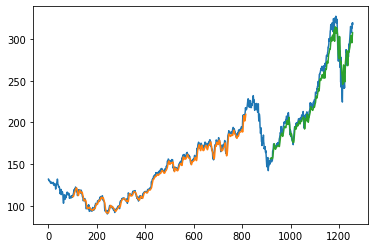

In [41]:
# shift train predict 
Look_back = 100 
Trainpredictplot = np.empty_like(Data_1)
Trainpredictplot[:,:] = np.nan
Trainpredictplot[Look_back: len(Train_Predict)+ Look_back, : ] = Train_Predict
# shift test predict
Testpredictplot = np.empty_like(Data_1)
Testpredictplot[:,:] = np.nan
Testpredictplot[len(Train_Predict) + (Look_back*2) + 1: len(Data_1)-1, : ] = Test_predict
# Plot baseline and predictions
plt.plot(Scalar.inverse_transform(Data_1))
plt.plot(Trainpredictplot)
plt.plot(Testpredictplot)
plt.show()